 #                Exploratory Data Analysis  -  Movies Trend Analysis 2006- 2016

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>

- 2. [Load the packages and data](#section2)</br>

- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Check if any Duplicate data in Title Column](#section305)<br/> 
    - 3.6 [Pandas profiling](#section306)<br/>
    - 3.7 [Initial observations](#section307)<br/>
  
- 4. [Data Processing](#section4)</br>
    - 4.1 [Replacing Missing Values for Metascore ,Revenue (Millions)](#section401)<br/>
    - 4.2 [New Column Addition  'Rating_Class' based  on Rating Column](#section402)<br/>
    - 4.3 [New Column Addition 'Votess_Class' based on  'Votes' Column](#section403)<br/>
    - 4.4 [New Column Addition "Film_Type" based on 'Runtime (Minutes)'](#section404)<br/>
    - 4.5 [Processing on 'Genre'  column](#section405)<br/>
    - 4.6 [Processing on 'Actors'  column](#section406)<br/>            
    - 4.7 [Pandas Profiling after Data processing](#section407)<br/>
-
- 5. [Top Questions](#section6)</br>
     - 5.1 [How is Growth in Movie Industry from 2006 to 2016](#section501)<br/>
       5.2 [what is Relationhip Beteen Rating and Metascore](#section502)<br/>
       5.3 [what is Relationhip Beteen Rating and Revenue?](#section503)<br/>
       5.4 [what is Relationhip Beteen Rating and Votes??](#section504)<br/>
       5.5 [what is Relationhip Beteen Metascore and Votes](#section505)<br/>
       5.6 [what is Relation Beteen Movie Duration and Revenues](#section506)<br/>
       5.7 [Top Ten Movies by High Revenue and Low Revenue .](#section507)<br/>
       5.8 [Top Ten Succesfull Actor/Actress  .](#section508)<br/>
       5.9 [Top Ten Movies with High Ratings 2006-2016](#section509)<br/>
       5.10 [Top Ten Movies with High Metascore 2006-2016 .](#section510)<br/>
       5.11 [Top Ten Genre in Combination wit High Revenues 2006-2016.](#section511)<br/>
       5.12[Top Ten Movies Directors .](#section512)<br/>
    
     
- 6. [Actionable Insights](#section6)<br/>

<a id=section1></a> 
## 1. Problem Statement  

one of the Investor "IRA Productions" approached me in 2017 to consult on the Ideas on Investing Money on Movies.
They are not sure which type of movie they should make that may have  higher chances of success and can become 
a super hit of 2017 .

This Analysis will help to understand the dynamics and trends of Entertainment /Film Industry around the world  during 2006 to 2016.



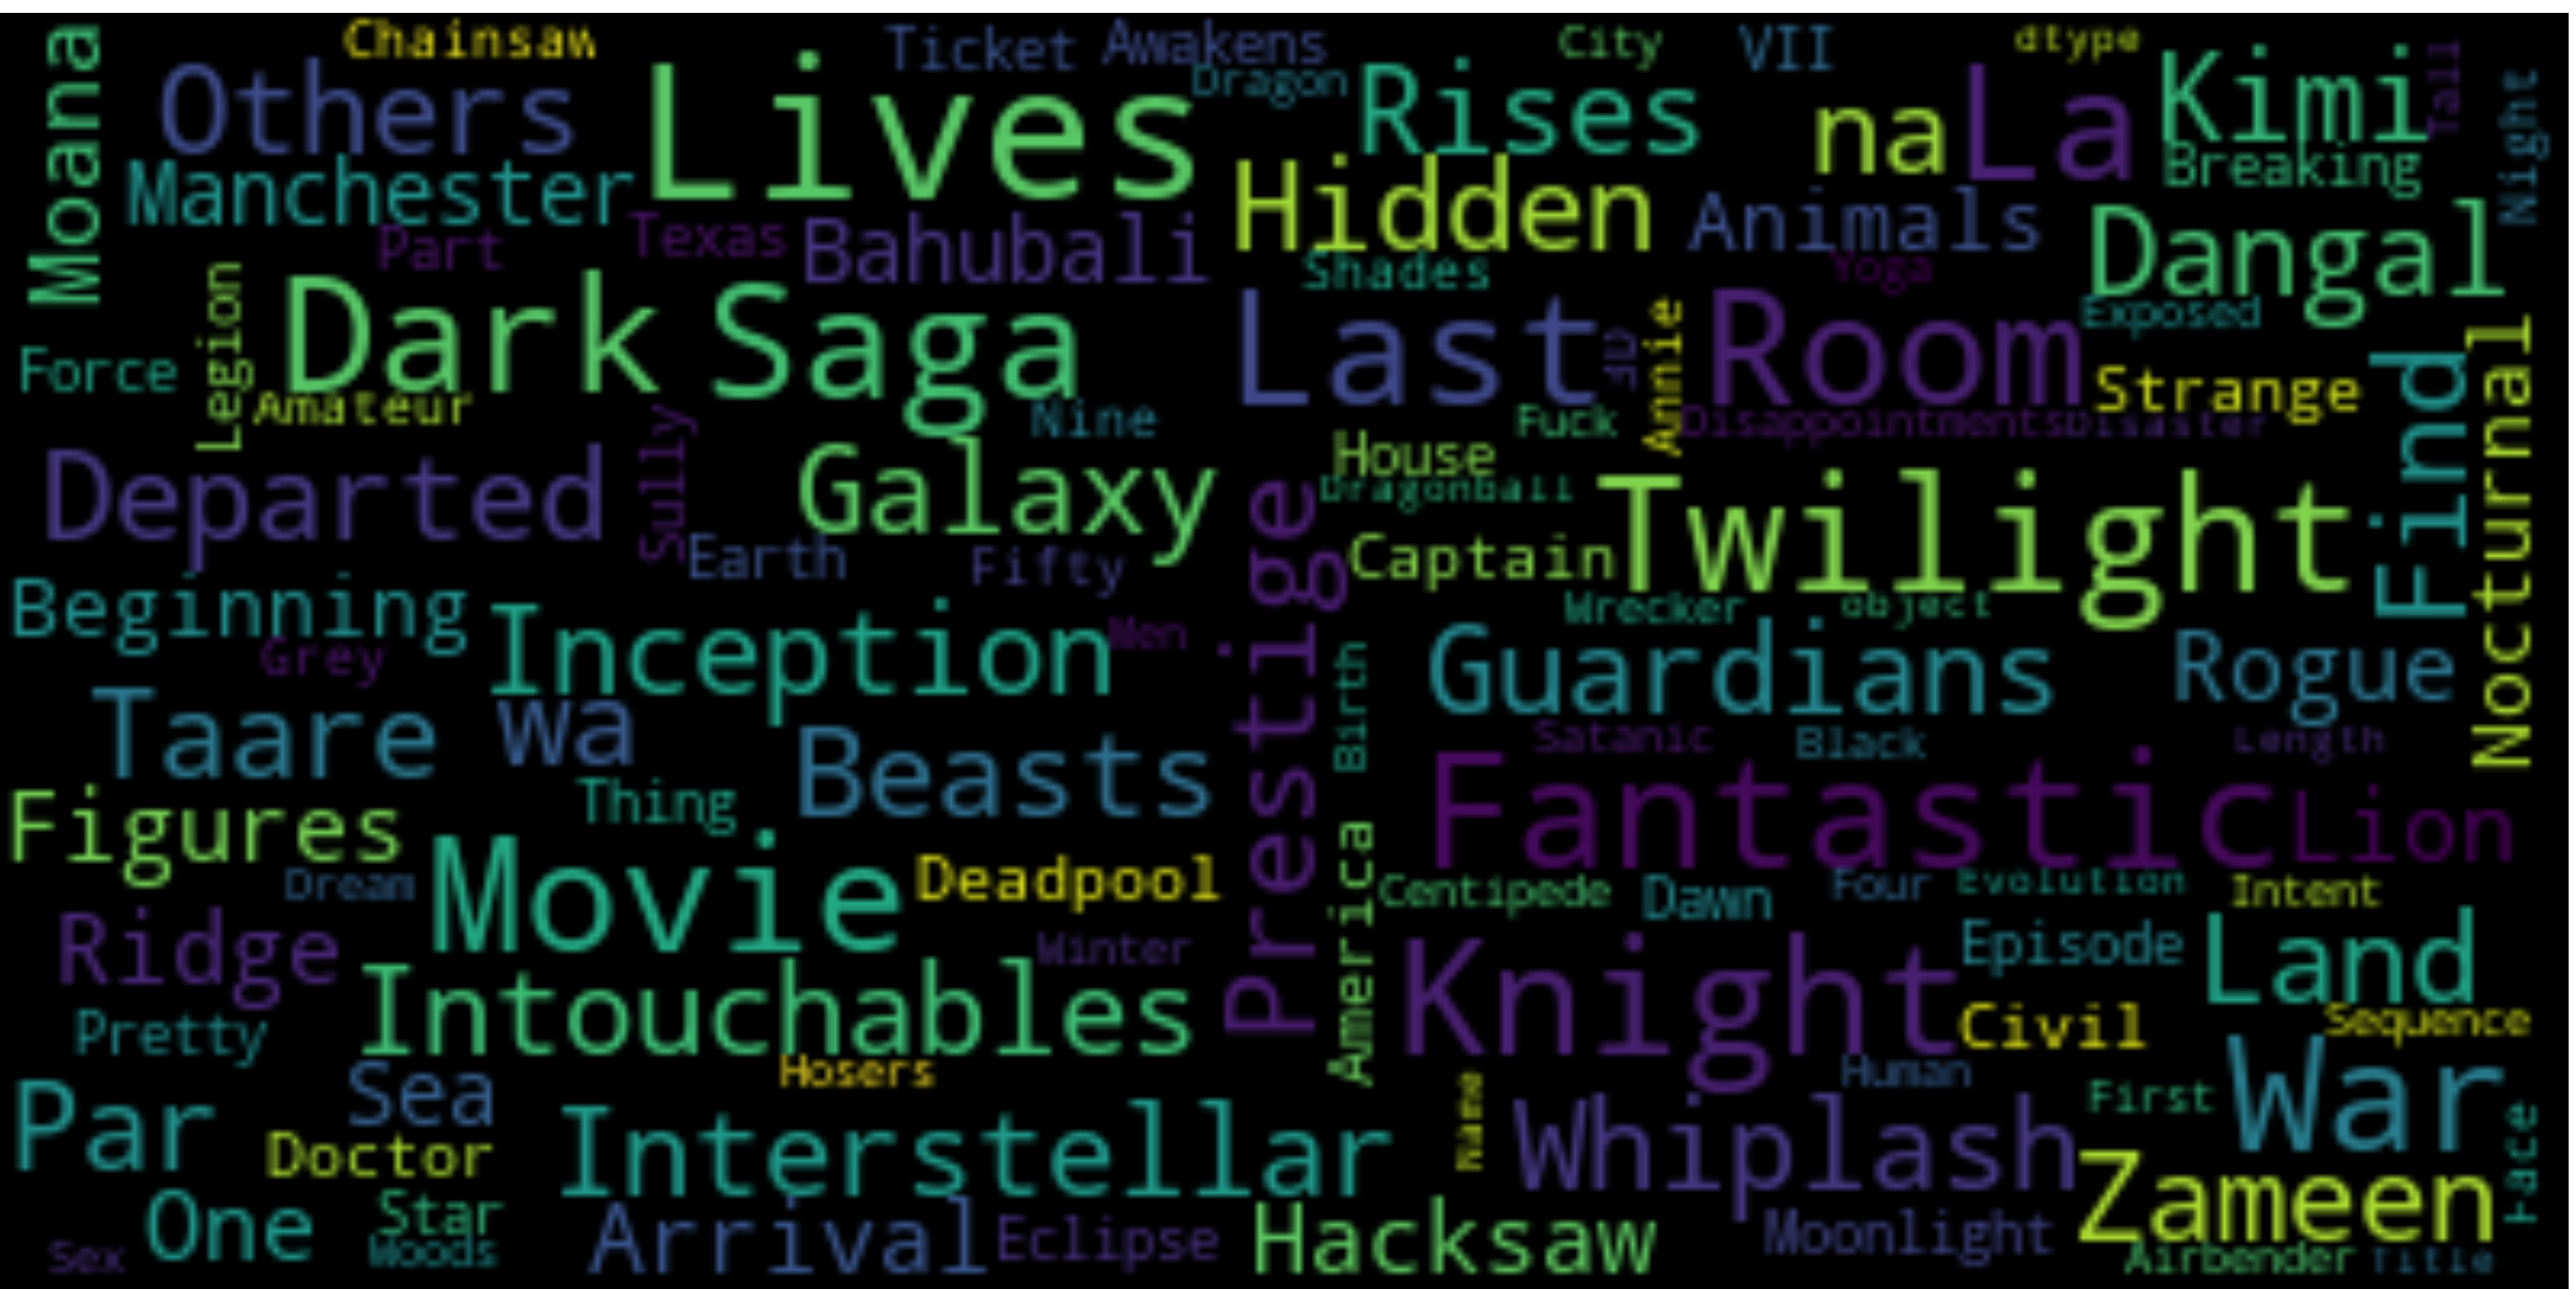



<a id=section101></a> 
### 1.1. Introduction
   This Exploratory Data Analysis is an attempt to understand the Viewers experience and make meaningfull assumption for 
   course of Action

<a id=section102></a> 
### 1.2. Data source and dataset
    The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the           period 2006-2016. IMDb is an online database of information related to films, television programs, home videos and         video games, and internet streams, including cast, production crew and personnel biographies, plot summaries,                       trivia, and fan reviews and ratings.
        
        https://www.imdb.com/
        https://www.metacritic.com/
        https://github.com/insaid2018/Term-1/tree/master/Data/Projects 



<a id=section2></a> 
### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import bokeh
import xlrd
import xlsxwriter
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import pandas_profiling
import plotly.plotly as py
import plotly.graph_objs as go

import seaborn as sns    # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

pd.set_option('mode.chained_assignment',None)



# Create URL to Excel file (alternatively this can be a filepath).

excel_file = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv'
mv2 = pd.read_csv(excel_file)

print("File Reading Done Successfully")

C:\Users\IRA\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\IRA\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\IRA\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\IRA\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\IRA\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\IRA\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\IRA\Anaconda3\l

File Reading Done Successfully


<a id=section3></a> 
### 3. Data Profiling

We have the following column and their datatype a below :

<a id=section301 > </a>
### 3.1 dtypes

<a id=section301></a> 

In [2]:
mv2.dtypes                                                                       # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

### Field Discription
|Columns | Description     |
|---------|-----------------|
|Rank  | Movie rank order|
|Title |The title of the film|
|Genre | A comma-separated list of genres used to classify the film|
|Description|Brief one-sentence movie summary|
|Director|The name of the film's director|
|Actors  |A comma-separated list of the main stars of the film|
|Year    |The year that the film released as an integer.|
|Runtime (Minutes)|The duration of the film in minutes.|
|Rating|User rating for the movie 0-10|
|Votes|Number of votes|
|Revenue (Millions) | Movie revenue in millions|
|Metascore|An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|



<a id=section302 > </a>
### 3.2 head

In [40]:
mv2.head(2)                                                                      # Display the first five rows of the data set

Rank            Title                   Genre  \
36    37     Interstellar  Adventure,Drama,Sci-Fi   
54    55  The Dark Knight      Action,Crime,Drama   

                                          Description           Director  \
36  A team of explorers travel through a wormhole ...  Christopher Nolan   
54  When the menace known as the Joker wreaks havo...  Christopher Nolan   

                                               Actors  Year  \
36  Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
54  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   

    Runtime (Minutes)  Rating    Votes  Revenue (Millions)  Metascore  \
36                169     8.6  1047747              187.99       74.0   
54                152     9.0  1791916              533.32       82.0   

   Rating_Class Votes_Class Film_Duration_Type  Votes_Scaled  
36    Excellent        High          Very Long      1047.747  
54    Excellent   Very High          Very Long      1791.916

<a id=section303 > </a>
### 3.3 describe

<a id=section303><a/>

In [4]:
mv2.describe(include = 'all')                             # Descriptive statistics for the numerical variables

Rank     Title                    Genre  \
count   1000.000000      1000                     1000   
unique          NaN       999                      207   
top             NaN  The Host  Action,Adventure,Sci-Fi   
freq            NaN         2                       50   
mean     500.500000       NaN                      NaN   
std      288.819436       NaN                      NaN   
min        1.000000       NaN                      NaN   
25%      250.750000       NaN                      NaN   
50%      500.500000       NaN                      NaN   
75%      750.250000       NaN                      NaN   
max     1000.000000       NaN                      NaN   

                                              Description      Director  \
count                                                1000          1000   
unique                                               1000           644   
top     A New York writer on sex and love is finally g...  Ridley Scott   
freq                                                    1             8   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

                                                   Actors         Year  \
count                                                1000  1000.000000   
unique                                                996          NaN   
top     Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...          NaN   
freq                                                    2          NaN   
mean                                                  NaN  2012.783000   
std                                                   NaN     3.205962   
min                                                   NaN  2006.000000   
25%                                                   NaN  2010.000000   
50%                                                   NaN  2014.000000   
75%                                                   NaN  2016.000000   
max                                                   NaN  2016.000000   

        Runtime (Minutes)       Rating         Votes  Revenue (Millions)  \
count         1000.000000  1000.000000  1.000000e+03          872.000000   
unique                NaN          NaN           NaN                 NaN   
top                   NaN          NaN           NaN                 NaN   
freq                  NaN          NaN           NaN                 NaN   
mean           113.172000     6.723200  1.698083e+05           82.956376   
std             18.810908     0.945429  1.887626e+05          103.253540   
min             66.000000     1.900000  6.100000e+01            0.000000   
25%            100.000000     6.200000  3.630900e+04           13.270000   
50%            111.000000     6.800000  1.107990e+05           47.985000   
75%            123.000000     7.400000  2.399098e+05          113.715000   
max            191.000000     9.000000  1.791916e+06          936.630000   

         Metascore  
count   936.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     58.985043  
std      17.194757  
min      11.000000  
25%      47.000000  
50%      59.500000  
75%      72.000000  
max     100.000000

<a id=section304 > </a>
### 3.4 Sample

<a id=section304></a> 

In [5]:
mv2.sample(5)                                                                  # Display a random 10 rows from the data set

Rank                     Title                    Genre  \
571   572                 Enchanted  Animation,Comedy,Family   
253   254  The Amazing Spider-Man 2  Action,Adventure,Sci-Fi   
782   783                Mr. Brooks     Crime,Drama,Thriller   
788   789      Hotel Transylvania 2  Animation,Comedy,Family   
804   805                      1408           Fantasy,Horror   

                                           Description            Director  \
571  A young maiden in a land called Andalasia, who...          Kevin Lima   
253  When New York is put under siege by Oscorp, it...           Marc Webb   
782  A psychological thriller about a man who is so...      Bruce A. Evans   
788  Dracula and his friends try to bring out the m...  Genndy Tartakovsky   
804  A man who specializes in debunking paranormal ...     Mikael Håfström   

                                                Actors  Year  \
571  Amy Adams, Susan Sarandon, James Marsden, Patr...  2007   
253  Andrew Garfield, Emma Stone, Jamie Foxx, Paul ...  2014   
782  Kevin Costner, Demi Moore, William Hurt, Dane ...  2007   
788  Adam Sandler, Andy Samberg, Selena Gomez, Kevi...  2015   
804  John Cusack, Samuel L. Jackson, Mary McCormack...  2007   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
571                107     7.1  150353              127.71       75.0  
253                142     6.7  342183              202.85       53.0  
782                120     7.3  128146               28.48       45.0  
788                 89     6.7   69157              169.69       44.0  
804                104     6.8  221073               71.98       64.0

<a id=section305 > </a>
### 3.5 Check if any Duplicate data in Title Column

In [6]:
# Find out the movies with duplicate 'Title'
mv2.loc[mv2.Title.duplicated(keep=False)]

Rank     Title                     Genre  \
239   240  The Host  Action,Adventure,Romance   
632   633  The Host       Comedy,Drama,Horror   

                                           Description       Director  \
239  When an unseen enemy threatens mankind by taki...  Andrew Niccol   
632  A monster emerges from Seoul's Han River and f...   Bong Joon Ho   

                                                Actors  Year  \
239  Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger  2013   
632  Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...  2006   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
239                125     5.9  96852               26.62       35.0  
632                120     7.0  73491                2.20       85.0

#### Movie "The Host" is having 2 rows but they are releaed in  diffrent year . So there in no duplicate record here

<a id=section3.6 > </a>
### 3.6 Pandas profiling

In [2]:
profile = pandas_profiling.ProfileReport(mv2)
profile.to_file(outputfile="movies_before_preprocessing.html")

<a id=section307></a> 
### 3.7. Initial observations:

From the Pandas Profile report it is clear that 

- The following variables have null values that may need to addressed.
 - <strong>Metascore</strong>: Metascore has 64 / 6.4% missing values Missing 
 
 - <strong>Revenue (Million)</strong>:     Revenue (Millions) has 128 / 12.8% missing values Missing
 

 

<a id=section4></a> 
# 4 Data Processing


###  Explore the Metascore and Revenue (Million):  if any are NaN.

In [3]:
print("Metascore")                                                                
print("Minimum value: ", mv2['Metascore'].min())
print("Maximum value: ", mv2['Metascore'].max())
print("How many values are NaN?: ", pd.isnull(mv2['Metascore']).sum())
print('===========================')
print("Revenue (Millions)")                                                                
print("Minimum value: ", mv2['Revenue (Millions)'].min())
print("Maximum value: ", mv2['Revenue (Millions)'].max())
print("How many values are NaN?: ", pd.isnull(mv2['Revenue (Millions)']).sum())

Metascore
Minimum value:  11.0
Maximum value:  100.0
How many values are NaN?:  64
Revenue (Millions)
Minimum value:  0.0
Maximum value:  936.63
How many values are NaN?:  128


<a id=section401></a>
### 4.1 Replacing Missing Values for Metascore ,Revenue (Millions) 
Replacing Missing Values for Metascore ,Revenue (Millions) based on the median of Metascore ,,Revenue (Millions) based on correponding Ratings

#1) If Rating  > '8.5'  :
Take all the record whose Rating  >= 8.5 and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#2) If Rating  < '8.5' and Rating  >= 7.5 :
Take all the record whose Rating  < 7.5 and Rating  >= 6.5and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#3) If Rating  < '7.5' and Rating  >= 6.5 :
Take all the record whose Rating  < 6.5 and Rating  >= 5.5 and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#4) If Rating  < '6.5' and Rating  >= 5.5  :
Take all the record whose Rating  < 5.5 and Rating  >= 4.5'  and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#5) If Rating  < '5.5' and Rating  >= 4.5  : 
Take all the record whose Rating  < 4.5 and Rating  >= 3.5  and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#6) If Rating  < '4.5' and Rating  >= 3.5 : 
Take all the record whose  Rating  < 3.5 and Rating  >= 2.5 and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#7) If Rating  < '3.5' and Rating  >= 2.5 : 
Take all the record whose  Rating  < 3.5 and Rating  >= 2.5  and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)

#8) If Rating  < '2.5' :
Take all the record whose Rating  < 2.5   and Replace the Metascore with Median of Metascore and Replace the Revenue (Millions) with the Median Revenue (Millions)


In [4]:
################ Replacing Missing Values for Metascore ,Revenue (Millions) ###########
MEDIAN_REV1    =  mv2.loc[mv2['Rating']  >= 8.5 ]
MEDIAN_REV1_M  =  MEDIAN_REV1['Revenue (Millions)'].median()
MEDIAN_META1   =  MEDIAN_REV1['Metascore'].median()

MEDIAN_REV2    =  mv2.loc[(mv2['Rating']  < 8.5 ) & (mv2['Rating']  >= 7.5 ) ]
MEDIAN_REV2_M  =  MEDIAN_REV2['Revenue (Millions)'].median()
MEDIAN_META2   =  MEDIAN_REV2['Metascore'].median()

MEDIAN_REV3    =  mv2.loc[(mv2['Rating']  < 7.5 ) & (mv2['Rating']  >= 6.5 ) ]
MEDIAN_REV3_M  =  MEDIAN_REV3['Revenue (Millions)'].median()
MEDIAN_META3   =  MEDIAN_REV3['Metascore'].median()

MEDIAN_REV4    =  mv2.loc[(mv2['Rating']  < 6.5 ) & (mv2['Rating']  >= 5.5 ) ]
MEDIAN_REV4_M  =  MEDIAN_REV4['Revenue (Millions)'].median()
MEDIAN_META4   =  MEDIAN_REV4['Metascore'].median()

MEDIAN_REV5    = mv2.loc[(mv2['Rating']  < 5.5 ) & (mv2['Rating']  >= 4.5 ) ]
MEDIAN_REV5_M  = MEDIAN_REV5['Revenue (Millions)'].median()
MEDIAN_META5   = MEDIAN_REV5['Metascore'].median()

MEDIAN_REV6    = mv2.loc[(mv2['Rating']  < 4.5 ) & (mv2['Rating']  >= 3.5 ) ]
MEDIAN_REV6_M  = MEDIAN_REV6['Revenue (Millions)'].median()
MEDIAN_META6   = MEDIAN_REV6['Metascore'].median()


MEDIAN_REV7    = mv2.loc[(mv2['Rating']  < 3.5 ) & (mv2['Rating']  >= 2.5 ) ]
MEDIAN_REV7_M  = MEDIAN_REV7['Revenue (Millions)'].median()
MEDIAN_META7   = MEDIAN_REV7['Metascore'].median()

MEDIAN_REV8    = mv2[mv2['Rating']  < 2.5]
MEDIAN_REV8_M  = MEDIAN_REV8['Revenue (Millions)'].median()
MEDIAN_META8   = MEDIAN_REV8['Metascore'].median()


MEDIAN_REV1['Metascore']=MEDIAN_REV1['Metascore'].fillna(MEDIAN_META1)
MEDIAN_REV1['Revenue (Millions)']=MEDIAN_REV1['Revenue (Millions)'].fillna(MEDIAN_REV1_M)

MEDIAN_REV2['Metascore']=MEDIAN_REV2['Metascore'].fillna(MEDIAN_META2)
MEDIAN_REV2['Revenue (Millions)']=MEDIAN_REV2['Revenue (Millions)'].fillna(MEDIAN_REV2_M)
                  
MEDIAN_REV3['Metascore']=MEDIAN_REV3['Metascore'].fillna(MEDIAN_META3)
MEDIAN_REV3['Revenue (Millions)']=MEDIAN_REV3['Revenue (Millions)'].fillna(MEDIAN_REV3_M)
                  
MEDIAN_REV4['Metascore']=MEDIAN_REV4['Metascore'].fillna(MEDIAN_META4)
MEDIAN_REV4['Revenue (Millions)']=MEDIAN_REV4['Revenue (Millions)'].fillna(MEDIAN_REV4_M)
                   
MEDIAN_REV5['Metascore']=MEDIAN_REV5['Metascore'].fillna(MEDIAN_META5)
MEDIAN_REV5['Revenue (Millions)']=MEDIAN_REV5['Revenue (Millions)'].fillna(MEDIAN_REV5_M)
                   
MEDIAN_REV6['Metascore']=MEDIAN_REV6['Metascore'].fillna(MEDIAN_META6)
MEDIAN_REV6['Revenue (Millions)']=MEDIAN_REV6['Revenue (Millions)'].fillna(MEDIAN_REV6_M)
                   
MEDIAN_REV7['Metascore']=MEDIAN_REV7['Metascore'].fillna(MEDIAN_META7)
MEDIAN_REV7['Revenue (Millions)']=MEDIAN_REV7['Revenue (Millions)'].fillna(MEDIAN_REV6_M)
                                      
MEDIAN_REV8['Metascore']=MEDIAN_REV8['Metascore'].fillna(MEDIAN_META8)
MEDIAN_REV8['Revenue (Millions)']=MEDIAN_REV8['Revenue (Millions)'].fillna(MEDIAN_REV7_M)
    

mv2  = pd.concat([MEDIAN_REV1,MEDIAN_REV2,MEDIAN_REV3,MEDIAN_REV4,MEDIAN_REV5,MEDIAN_REV6,MEDIAN_REV7,MEDIAN_REV8])




print ('Replaced Value for Metascore' )
print("Rating > '8.5' ",MEDIAN_META1)
print("Rating < '8.5' and Rating >= 7.5 :",MEDIAN_META2)
print("Rating < '7.5' and Rating >= 6.5 :",MEDIAN_META3)
print("Rating < '6.5' and Rating >= 5.5 :",MEDIAN_META4)
print("Rating < '5.5' and Rating >= 4.5 :",MEDIAN_META5)
print("Rating < '4.5' and Rating >= 3.5 :",MEDIAN_META6)
print("Rating < '3.5' and Rating >= 2.5 :",MEDIAN_META7)
print("Rating < '2.5' :",MEDIAN_META8)

print ('********************************************' )
print ('Replaced Value for Revenue (Millions)' )
print("Rating > '8.5' ",MEDIAN_REV1_M)
print("Rating < '8.5' and Rating >= 7.5 :",MEDIAN_REV2_M)
print("Rating < '7.5' and Rating >= 6.5 :",MEDIAN_REV3_M)
print("Rating < '6.5' and Rating >= 5.5 :",MEDIAN_REV4_M)
print("Rating < '5.5' and Rating >= 4.5 :",MEDIAN_REV5_M)
print("Rating < '4.5' and Rating >= 3.5 :",MEDIAN_REV6_M)
print("Rating < '3.5' and Rating >= 2.5 :",MEDIAN_REV7_M)
print("Rating < '2.5' :",MEDIAN_REV8_M)



Replaced Value for Metascore
Rating > '8.5'  78.0
Rating < '8.5' and Rating >= 7.5 : 75.0
Rating < '7.5' and Rating >= 6.5 : 61.0
Rating < '6.5' and Rating >= 5.5 : 47.0
Rating < '5.5' and Rating >= 4.5 : 40.0
Rating < '4.5' and Rating >= 3.5 : 31.0
Rating < '3.5' and Rating >= 2.5 : 51.0
Rating < '2.5' : 15.0
********************************************
Replaced Value for Revenue (Millions)
Rating > '8.5'  33.129999999999995
Rating < '8.5' and Rating >= 7.5 : 70.24
Rating < '7.5' and Rating >= 6.5 : 46.629999999999995
Rating < '6.5' and Rating >= 5.5 : 46.81
Rating < '5.5' and Rating >= 4.5 : 34.62
Rating < '4.5' and Rating >= 3.5 : 38.435
Rating < '3.5' and Rating >= 2.5 : 9.35
Rating < '2.5' : 14.17


#### After Procesing No NaN value Exist .

In [5]:
print("Metascore")                                                                
print("Minimum value: ", mv2['Metascore'].min())
print("Maximum value: ", mv2['Metascore'].max())
print("How many values are NaN?: ", pd.isnull(mv2['Metascore']).sum())
print('===========================')
print("Revenue (Millions)")                                                                
print("Minimum value: ", mv2['Revenue (Millions)'].min())
print("Maximum value: ", mv2['Revenue (Millions)'].max())
print("How many values are NaN?: ", pd.isnull(mv2['Revenue (Millions)']).sum())                   

Metascore
Minimum value:  11.0
Maximum value:  100.0
How many values are NaN?:  0
Revenue (Millions)
Minimum value:  0.0
Maximum value:  936.63
How many values are NaN?:  0


<a id=section402></a> 
### 4.2 New Column Addition  'Rating_Class' based  on Rating Column


['Excellent', 'Great', 'Average', 'Poor'],

In [6]:
################ Adding New Column Rating_Class based on Rating ###########


mv2['Rating_Class'] = mv2.apply(lambda x: 'Excellent' if x['Rating']>8 
                                else ('Great' if x['Rating']>6 
                                        else  ('Average' if x['Rating'] > 4 else 'Poor')) ,axis=1)
mv2['Rating_Class'].unique()

array(['Excellent', 'Great', 'Average', 'Poor'], dtype=object)

<a id=section403></a>
### 4.3 New Column Addition 'Votess_Class' based on  'Votes' Column

In [7]:
################ Adding New Column 'Votes_Class' based on 'Votes' Column ###########

mv2['Votes_Class'] = mv2.apply(lambda x: 'Very High' if x['Votes']>1500000 
                                else ('High' if x['Votes']>500000 
                                        else  ('Average' if x['Votes'] > 100000 
                                            else  ('Poor' if x['Votes'] > 50000 else 'Very Poor'))),axis=1)
mv2['Votes_Class'].unique()

array(['High', 'Very High', 'Very Poor', 'Average', 'Poor'], dtype=object)

<a id=section404></a>
### 4.4 New Column Addition "Film_Type"  based on 'Runtime (Minutes)'

In [8]:
################ Adding New Column 'Votes_Class' based on Genre Column ###########

mv2['Film_Duration_Type'] = mv2.apply(lambda x: ' Very Long' if x['Runtime (Minutes)']>150 
                                else ('Long' if x['Runtime (Minutes)']>120
                                      else ('Average' if x['Runtime (Minutes)']>90
                                           else  ('Short' if x['Runtime (Minutes)'] > 50 else 'Very short'))),axis=1)
mv2['Film_Duration_Type'].unique()

array([' Very Long', 'Long', 'Average', 'Short'], dtype=object)

<a id=section401><a/>

<a id=section405></a>
### 4.5  Processing on 'Genre'  column

In [9]:
############################# GENRE Processing ################################################
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

excel_file2 = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv'
mv4 = pd.read_csv(excel_file2)

#mv4 =mv2
mv4.Genre = mv4.Genre.str.split(',')
mv4 = explode(mv4, ['Genre'])


######## Saving Procesed Data into .xlsx File ########
mv4.to_excel("mv4.xlsx")  
mv4.head(2)                                           # Confirm that all variable names are now lower case

Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   

                                         Description    Director  Metascore  \
0  A group of intergalactic criminals are forced ...  James Gunn       76.0   
1  A group of intergalactic criminals are forced ...  James Gunn       76.0   

   Rank  Rating  Revenue (Millions)  Runtime (Minutes)  \
0     1     8.1              333.13                121   
1     1     8.1              333.13                121   

                     Title   Votes  Year      Genre  
0  Guardians of the Galaxy  757074  2014     Action  
1  Guardians of the Galaxy  757074  2014  Adventure

<a id=section406></a>
### 4.6.  Processing on 'Actors'  column

In [10]:
##############################

excel_file3 = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv'
mv5 = pd.read_csv(excel_file3)


mv5.Actors = mv5.Actors.str.split(',')
mv5 = explode(mv5, ['Actors'])

######## Saving Procesed Data into .xlsx File ########
mv5.to_excel("mv5.xlsx")  
mv5['Actors']
mv5.head(5)

Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
1  A group of intergalactic criminals are forced ...    James Gunn   
2  A group of intergalactic criminals are forced ...    James Gunn   
3  A group of intergalactic criminals are forced ...    James Gunn   
4  Following clues to the origin of mankind, a te...  Ridley Scott   

                      Genre  Metascore  Rank  Rating  Revenue (Millions)  \
0   Action,Adventure,Sci-Fi       76.0     1     8.1              333.13   
1   Action,Adventure,Sci-Fi       76.0     1     8.1              333.13   
2   Action,Adventure,Sci-Fi       76.0     1     8.1              333.13   
3   Action,Adventure,Sci-Fi       76.0     1     8.1              333.13   
4  Adventure,Mystery,Sci-Fi       65.0     2     7.0              126.46   

   Runtime (Minutes)                    Title   Votes  Year           Actors  
0                121  Guardians of the Galaxy  757074  2014      Chris Pratt  
1                121  Guardians of the Galaxy  757074  2014       Vin Diesel  
2                121  Guardians of the Galaxy  757074  2014   Bradley Cooper  
3                121  Guardians of the Galaxy  757074  2014      Zoe Saldana  
4                124               Prometheus  485820  2012     Noomi Rapace

<a id=section407></a>
### 4.7 Panda Profiling after Data Processing 

In [11]:
profile = pandas_profiling.ProfileReport(mv2)
profile.to_file(outputfile="mv2_movies_AFTER_processing.html")

profile = pandas_profiling.ProfileReport(mv4)
profile.to_file(outputfile="mv4.movies_AFTER_processing_Genre.html")

profile = pandas_profiling.ProfileReport(mv5)
profile.to_file(outputfile="mv5.movies_AFTER_processing_Actors.html")

<a id=section501 > </a>
## 5.1 How is Growth in Movie Industry from 2006 to 2016

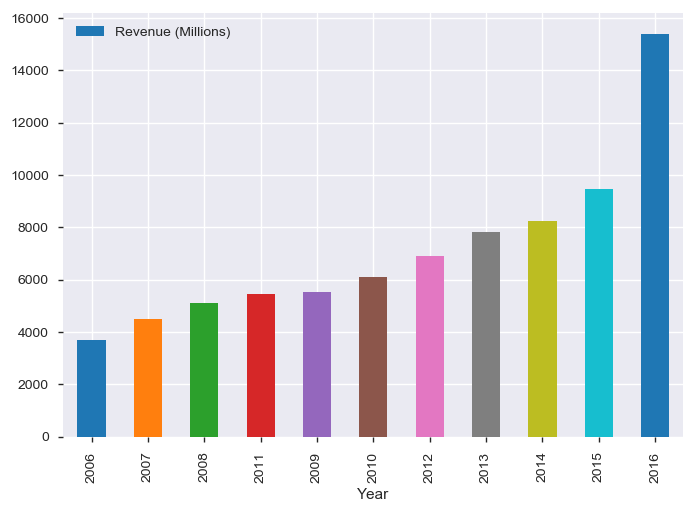

<Figure size 800x550 with 0 Axes>

In [12]:
# Year By Revenue (Millions)
Year_TR = mv2.groupby('Year')['Revenue (Millions)'].sum().sort_values(ascending=True)

Year_TR.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT1.png")

### Average Revenues on Year Basis Trend

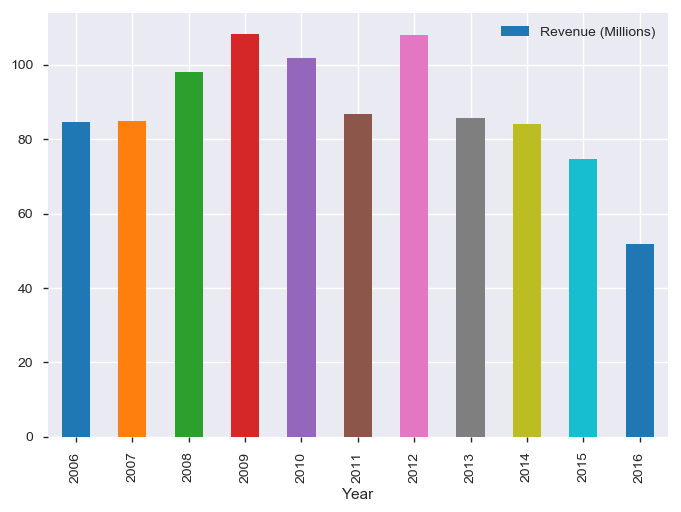

In [13]:
mv_avg_revenue = mv2.groupby('Year')['Revenue (Millions)'].mean()
mv_avg_revenue.plot(kind='bar',legend ='Test')
plt.savefig("PLT2.png")

# Conclusion : 
    From the chart we can see the the Upward trend from 2006 -2016 . But Average Revenue start decreasing from 2013 
    onward  due to more number of competitors. So we need to ensure that we produce Movies which can generate more votes
    and Rating from viewers and sametime revenue collection should be excellent.

<a id=section501 > </a>
## 5.2 what is Relationhip Beteen Rating and Metascore


In [15]:
mv2['Votes_Scaled']= mv2['Votes']/1000
sns.lmplot( x="Metascore", y="Rating", data=mv2, fit_reg=False, hue='Rating_Class', legend=True)
plt.savefig("PLT3.png")

# Conclusion :
    Movies which has Rating_Class = 'Excellent'  and having High Metascore will best movies for insipiration while 
    producing new movie
    
    Movies which falls under Rating_Class = 'Poor' should  be completed as there is high chance of failure and making losses
    

<a id=section503 > </a>
## 5.3 what is Relationhip Beteen Rating and Votes?

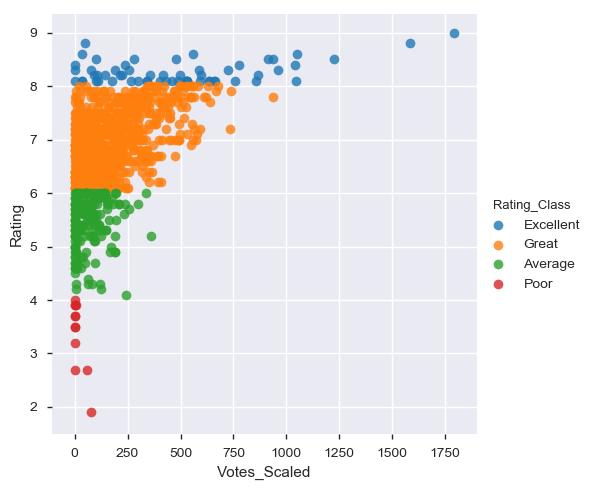

In [16]:
sns.lmplot( x="Votes_Scaled", y="Rating", data=mv2, fit_reg=False, hue='Rating_Class', legend=True)
plt.savefig("PLT4.png")

# Conclusion :
Movies which has Rating_Class = 'Excellent'  and having Higher Votes will best movies for insipiration while 
producing new movie

Movies which falls under Rating_Class = 'Poor' which recieved low vote should  be completed avoided a there is high 
chance of failure 

<a id=section504 > </a>
## 5.4 what is Relationhip Beteen Rating and Revenue (Millions)?

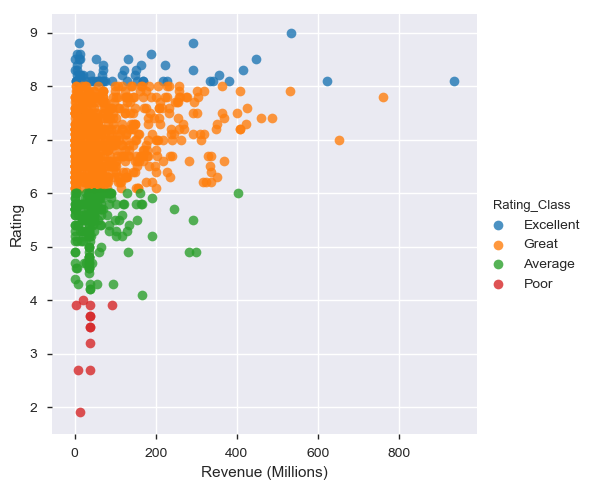

In [17]:
sns.lmplot( x="Revenue (Millions)", y="Rating", data=mv2, fit_reg=False, hue='Rating_Class', legend=True)
plt.savefig("PLT5.png")


In [18]:
ax = sns.violinplot(x="Rating_Class", y="Revenue (Millions)", data=mv2)
plt.savefig("PLT6.png")

# Conclusion :
Movies which has Rating_Class = 'Excellent' and having Higher Revenues will best movies for insipiration while producing new movie

Movies which falls under Rating_Class = 'Poor' which recieved low Revenues should be completed avoided a there is high chance of failure

<a id=section505 > </a>
## 5.5 what is Relationhip Beteen Metascore and Votes

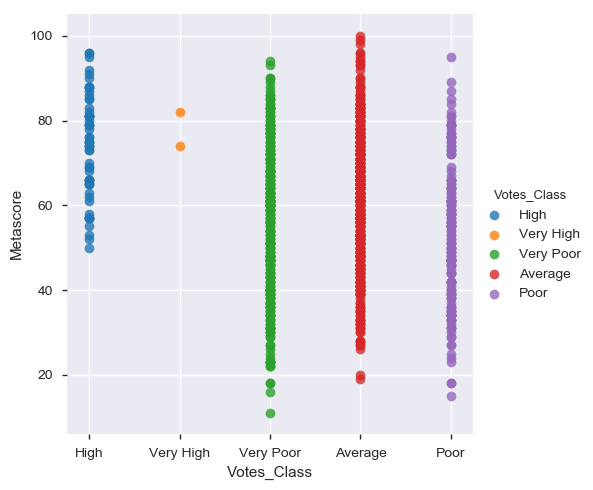

In [19]:
sns.lmplot( x="Votes_Class", y="Metascore", data=mv2, fit_reg=False, hue='Votes_Class', legend=True)
plt.savefig("PLT7.png")

# Conclusion :
Movies which has Votes_class in( ' Very High ',High ) and having Higher Metascore will best movies for insipiration while producing new movie

Movies which falls under Votes_Class in ( 'Poor', 'Very Poor' ) and recived Low  Metascore should be completed avoided a there is high chance of failure

<a id=section506 > </a>
## 5.6 Relation Beteen Movie Duration and Revenues

Film_Duration_Type
Short          3558.89
 Very Long     6673.83
Long          28297.39
Average       39710.50
Name: Revenue (Millions), dtype: float64


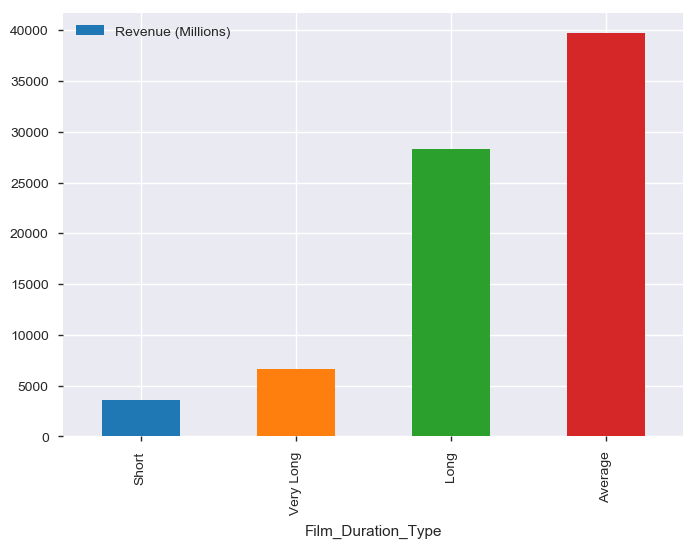

<Figure size 800x550 with 0 Axes>

In [20]:
Year_TR = mv2.groupby('Film_Duration_Type')['Revenue (Millions)'].sum().sort_values(ascending=True)
print(Year_TR )
Year_TR.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT8.png")

# Conclusion :
Movies which has Film Duration Type in( ' Long ',Average ) will have higher chances of success

Sort and Very short duration movies are not successful.

<a id=section507 > </a>
## 5.7 Top Ten Movies by High Revenue and Low Revenue .

In [21]:
###############Tc_1######################################################################333
rev =mv2.sort_values('Revenue (Millions)',ascending=False)
rev1= rev.head(10)

fig, ax = plt.subplots()
rev1.plot.barh(x = 'Title', y = 'Revenue (Millions)', rot = 360, ax = ax,align='center',color='blue',fontsize=12)
plt.title('Top Ten Movies with High Revenue 2006-2016')

plt.savefig("PLT9.png")

# Conclusion :

    Top five movies  :Star wars Epiode VI , Avatar , Jurassic World ,The Avengers ,The Dark Night



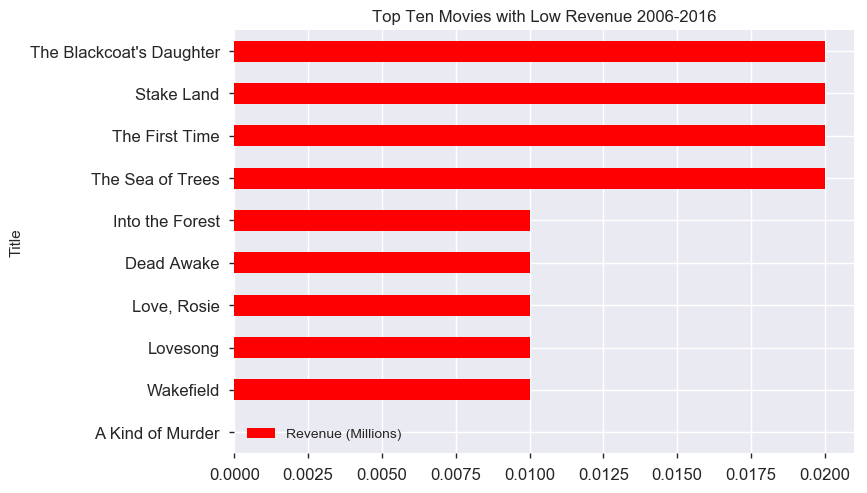

In [22]:
###############Tc_1######################################################################333
rev =mv2.sort_values('Revenue (Millions)',ascending=True)
rev1= rev.head(10)

fig, ax = plt.subplots()
rev1.plot.barh(x = 'Title', y = 'Revenue (Millions)', rot = 360, ax = ax,align='center',color='red',fontsize=12)
plt.title('Top Ten Movies with Low Revenue 2006-2016')

plt.savefig("PLT10.png")

# Conclusion :
Top five Flop movies  :A King of Murder , Wakefield , Jurassic Lovesong ,Love Rosie ,The Dead Awake

<a id=section508 > </a>
## 5.8 Top Ten Succesfull Actor/Actress .

Actors
Robert Downey Jr.    2564.58
Jennifer Lawrence    1757.99
Christian Bale       1559.62
 Zoe Saldana         1542.68
 Liam Hemsworth      1538.46
 Josh Hutcherson     1496.22
 Emma Watson         1388.85
Will Smith           1340.28
 Domhnall Gleeson    1299.63
Johnny Depp          1280.94
Name: Revenue (Millions), dtype: float64


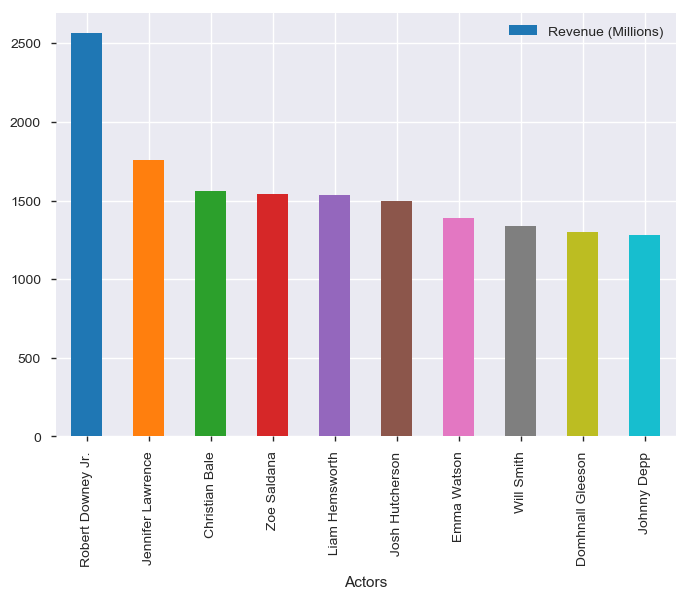

<Figure size 800x550 with 0 Axes>

In [23]:
# Richest Actor
Succesfull_Actors = mv5.groupby('Actors')['Revenue (Millions)'].sum().sort_values(ascending=False)
Succesfull_Actors= Succesfull_Actors.head(10)
print(Succesfull_Actors)
Succesfull_Actors.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT11.png")

# Conclusion :

Top five Succesfull Actor/Actress :Robert Downey , Jennifer Lawrence , Christian Bale ,Zoe Saldana ,Liam Hemsworth

<a id=section509 > </a>
## 5.9 Top Ten Movies with High Rating 2006-2016

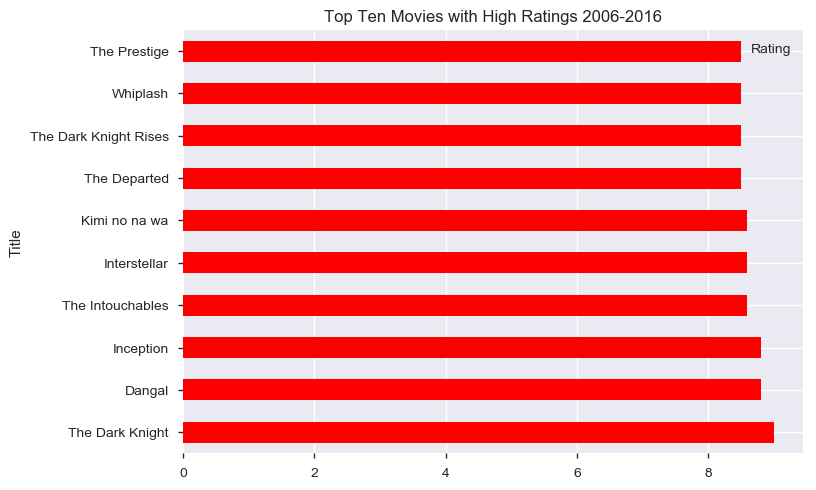

In [24]:
###############Tc_3######################################################################333
rev =mv2.sort_values('Rating',ascending=False)
rev1=rev.head(10)

fig, ax = plt.subplots()
rev1.plot.barh(x = 'Title', y = 'Rating', rot = 360,ax = ax,align='center',color='Red',fontsize=10)
plt.title('Top Ten Movies with High Ratings 2006-2016')
#for p in ax.patches: 
   # ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()))
    
plt.savefig("PLT12.png")

# Conclusion :
    
Top five Movies with High Ratings :The Dark Night , Dangal , Inception ,The Intouchable ,Interstellar

<a id=section510 > </a>
## 5.10 Top Ten Movies with High Metascore 2006-2016 .

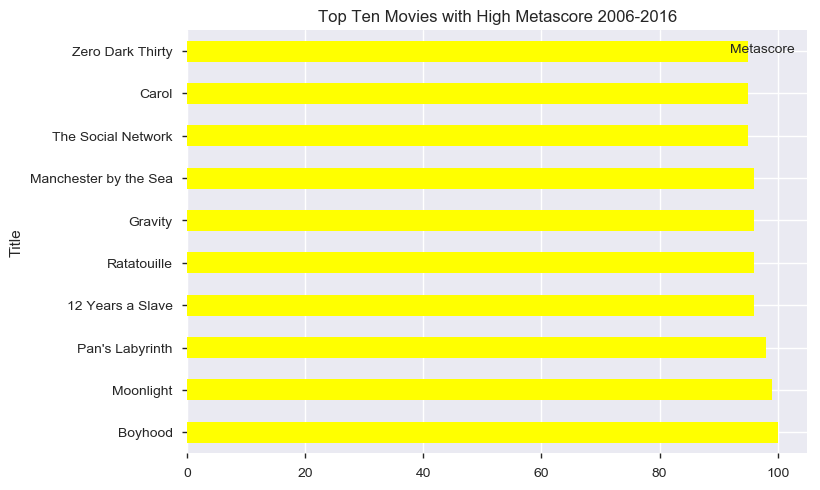

In [26]:
###############Tc_4######################################################################333
rev =mv2.sort_values('Metascore',ascending=False)
rev1=rev.head(10)

fig, ax = plt.subplots()
rev1.plot.barh(x = 'Title', y = 'Metascore', rot = 360,ax = ax,align='center',color='yellow', fontsize=10)
plt.title('Top Ten Movies with High Metascore 2006-2016')
    
plt.savefig("PLT13.png")

# Conclusion :
Top five Movies Based pn High Metascore  : Boyhood , Moonlight , Pan's Labyrinth ,12 Year a slave ,Gravity

<a id=section511 > </a>
## 5.11 Top Ten Most Successfull Genre .

In [27]:
# Richest Director
Rich_Director = mv4.groupby(['Genre'])['Revenue (Millions)'].sum().sort_values(ascending=False)
Rich_Director= Rich_Director.head(20)
Rich_Director.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT14.png")

<Figure size 800x550 with 0 Axes>

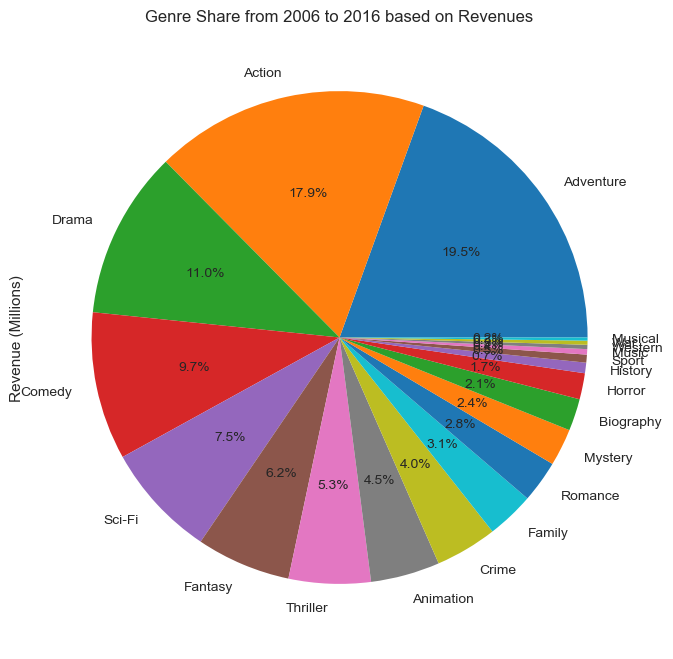

In [28]:
Genre_share = mv4.groupby(['Genre'])['Revenue (Millions)'].sum().sort_values(ascending=False)
Genre_share.plot.pie(y='Genre', figsize=(8, 8),fontsize=10,title= 'Genre Share from 2006 to 2016 based on Revenues',autopct='%1.1f%%')
plt.savefig("PLT15.png")

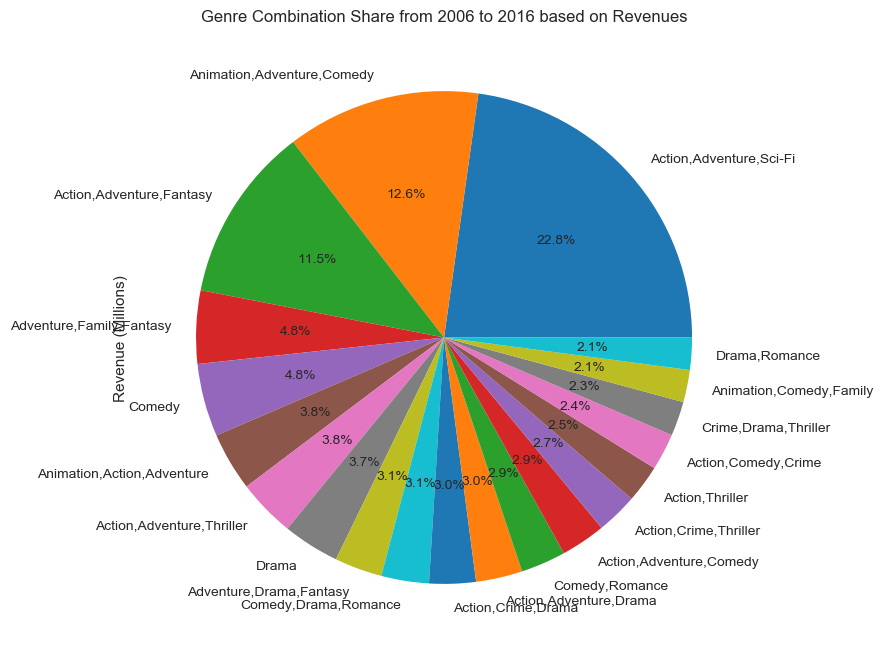

In [29]:
# Best Genre Combination
Genre_share1 = mv2.groupby('Genre')['Revenue (Millions)'].sum().sort_values(ascending=False)
Genre_share1= Genre_share1.head(20)
#print(Genre_share1)

Genre_share1.plot.pie(y='Genre', figsize=(8, 8),fontsize=10,title= 'Genre Combination Share from 2006 to 2016 based on Revenues',autopct='%2.1f%%')
plt.savefig("PLT16.png")

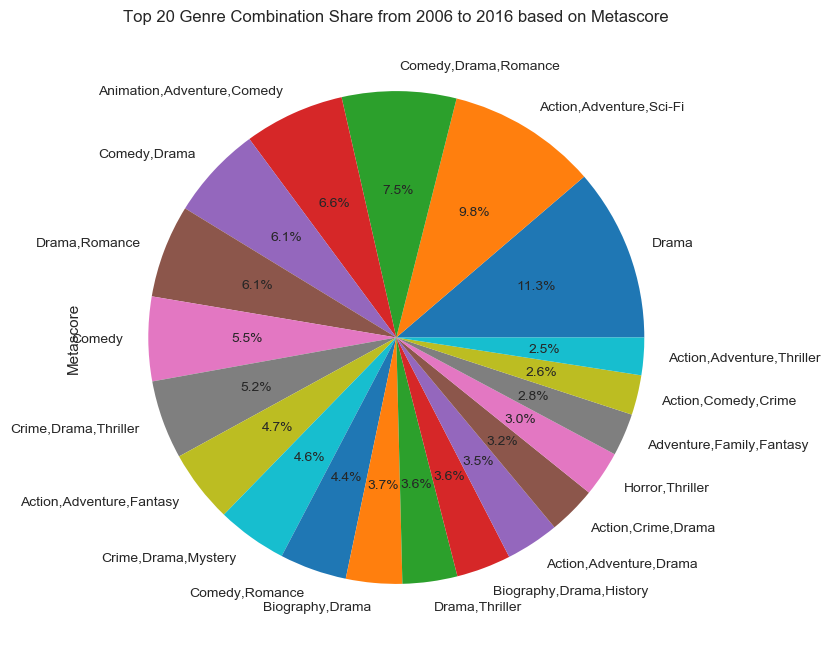

In [30]:
# Best Genre Combination
Genre_share2 = mv2.groupby('Genre')['Metascore'].sum().sort_values(ascending=False)
Genre_share2= Genre_share2.head(20)
#print(Genre_share1)

Genre_share2.plot.pie(y='Genre', figsize=(8, 8),fontsize=10,title= 'Top 20 Genre Combination Share from 2006 to 2016 based on Metascore',autopct='%2.1f%%')
plt.savefig("PLT17.png")

Genre
Drama                         3194.0
Action,Adventure,Sci-Fi       2756.0
Comedy,Drama,Romance          2102.0
Animation,Adventure,Comedy    1848.0
Comedy,Drama                  1729.0
Drama,Romance                 1723.0
Comedy                        1559.0
Crime,Drama,Thriller          1456.0
Action,Adventure,Fantasy      1340.0
Crime,Drama,Mystery           1295.0
Comedy,Romance                1234.0
Biography,Drama               1033.0
Drama,Thriller                1008.0
Biography,Drama,History       1004.0
Action,Adventure,Drama         983.0
Action,Crime,Drama             890.0
Horror,Thriller                841.0
Adventure,Family,Fantasy       787.0
Action,Comedy,Crime            736.0
Action,Adventure,Thriller      693.0
Name: Metascore, dtype: float64


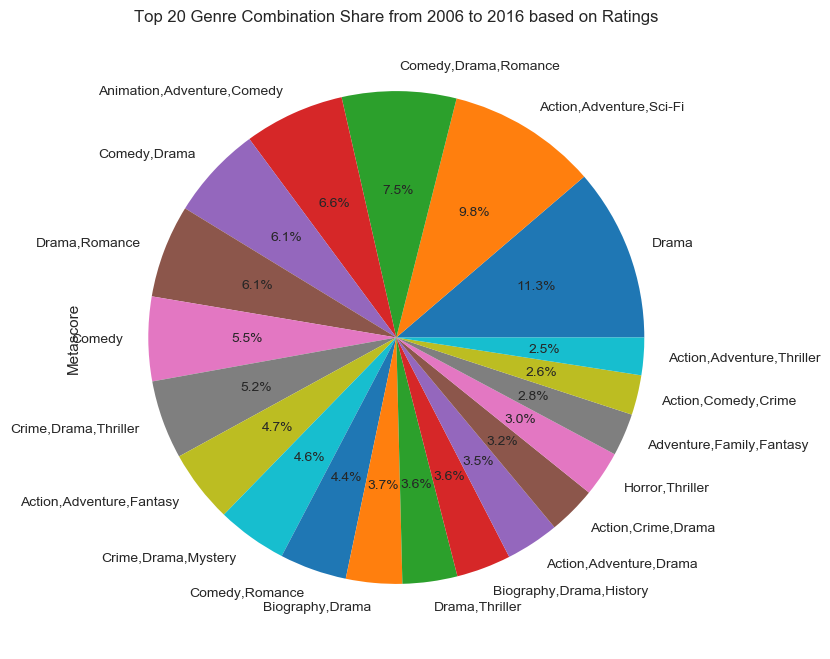

In [31]:
# Best Genre Combination
Genre_share3 = mv2.groupby('Genre')['Rating'].sum().sort_values(ascending=False)
Genre_share3= Genre_share2.head(20)
print(Genre_share3)

Genre_share3.plot.pie(y='Genre', figsize=(8, 8),fontsize=10,title= 'Top 20 Genre Combination Share from 2006 to 2016 based on Ratings',autopct='%2.1f%%')
plt.savefig("PLT18.png")

# Conclusion :
    
Genre With 'ADVENTURE' ,'Action' , 'Drama' and 'Comedy 'are Top 4 Genre from the Chart which earned 59% revenue alone.

Genre in Combination are :  Action,Adventure,Sci-Fi 
                            Comedy,Drama,Romance         
                            Animation,Adventure,Comedy

So Movies should be produced with these combination of Genre which is expected to have High Success Rate. 

<a id=section512 > </a>
## 5.12 Top Ten Movies Directors .

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue (Millions), dtype: float64


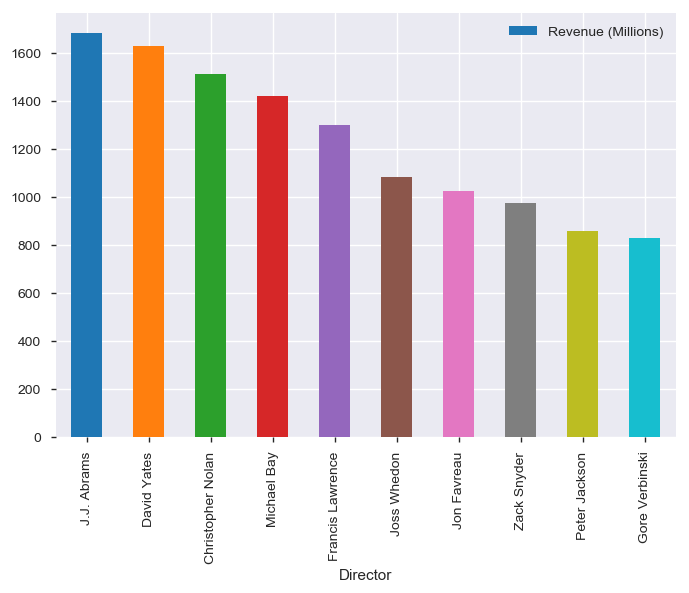

<Figure size 800x550 with 0 Axes>

In [32]:
# Richest Director
Rich_Director = mv2.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False)
Rich_Director= Rich_Director.head(10)
print(Rich_Director)
Rich_Director.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT19.png")

Director           Genre    
David Yates        Adventure    1630.51
J.J. Abrams        Adventure    1556.47
                   Action       1556.47
David Yates        Fantasy      1503.92
Michael Bay        Action       1371.45
                   Adventure    1318.63
                   Sci-Fi       1318.63
Christopher Nolan  Action       1274.02
David Yates        Family       1122.96
Joss Whedon        Sci-Fi       1082.27
                   Action       1082.27
Francis Lawrence   Action       1043.42
                   Adventure    1043.42
Jon Favreau        Adventure     994.36
Zack Snyder        Action        975.74
J.J. Abrams        Fantasy       936.63
Francis Lawrence   Sci-Fi        875.16
Peter Jackson      Fantasy       860.45
Justin Lin         Action        824.79
Gore Verbinski     Action        821.72
Name: Revenue (Millions), dtype: float64


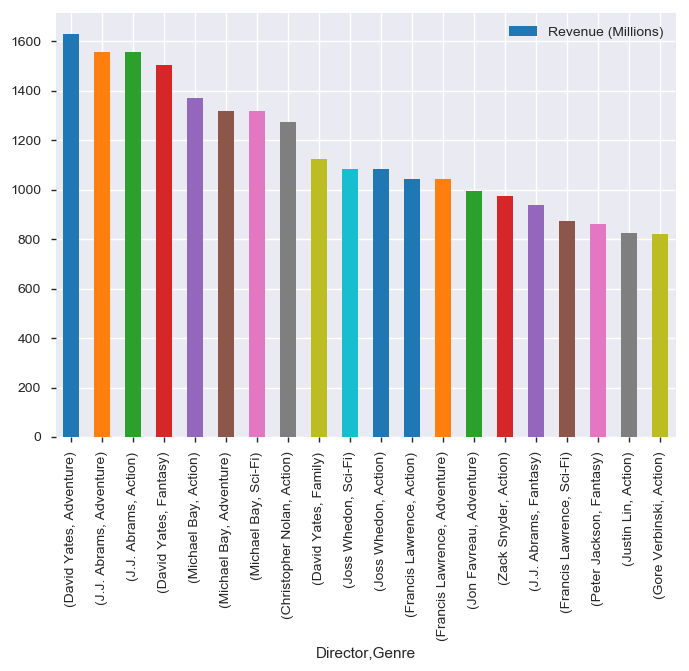

<Figure size 800x550 with 0 Axes>

In [33]:
# Richest Director
Rich_Director = mv4.groupby(['Director','Genre'])['Revenue (Millions)'].sum().sort_values(ascending=False)
Rich_Director= Rich_Director.head(20)
print(Rich_Director)

Rich_Director.plot(kind='bar',legend ='Test')
plt.show()
plt.savefig("PLT20.png")

##  Conclusion :
    
    Top Five Director are :  David Yates ,J. J. Abrams , Christopher Nolan , Michael Bay , Francis Lawrence
        if we Genre wise  : Adventure ,Action  : David Yates ,J.J. Abram
                            Fantasy            : David Yates
                            SCI-FI             : Michael Bay
    
    Overall J. J. Abrams Looks Best Director Genre wise David Yates is Better Director

# 5.13 Relationship between Revenue, Rating and Metascore of Movies

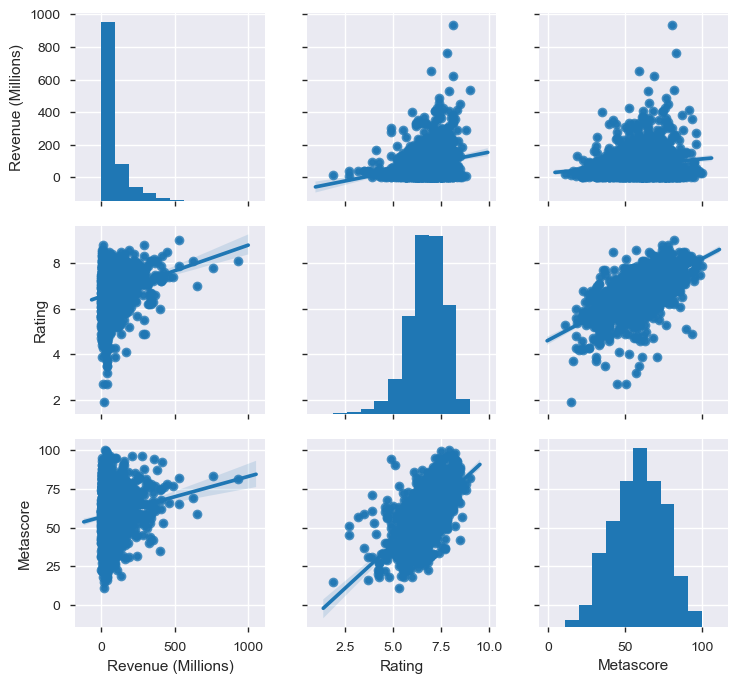

In [37]:
rt1=sns.pairplot(mv2, palette="muted",height=2.5,vars=['Revenue (Millions)', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
rt1=rt1.map_offdiag(plt.scatter,s=20,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies');

### Conclusion :
    
  Ratings and Metascore are related to each other which may impact the revenues of the movie.  


<a id=section6 > </a>
#  6 Actionable Insights

1) 'Genre' of the Movie : Individual Genre   :    Action , Adventure ,Drama ,Comedy 
                           
                           Genre in Combination : 1) Action,Adventure,Sci-Fi    
                                                  2) Animation,Adventure,Comedy     
                                                  3)Action,Adventure,Fantasy  
                                                  4)Adventure,Family,Fantasy  

2)  Ideal Runtime of the movie   :   Duration Type hould be  in( ' Long ',Average )
                                            Runtime (Minutes) >150  : Very Long
                                            Runtime (Minutes) >120  : Long
                                            Runtime (Minutes) > 90  : Average
                                            Runtime (Minutes) < 90  : Short
                                     

3)  Directors to Choose for the Movie :  David Yates ,J. J. Abrams , Christopher Nolan ,
                                                                 Michael Bay , Francis Lawrence
                                        
                                        if we go  Genre wise   : Adventure ,Action  : David Yates ,J.J. Abram
                                                                  Fantasy            : David Yates
                                                                  SCI-FI             : Michael Bay

4)  Actor/Actress to choose for the Movie : Robert Downey , Jennifer Lawrence , Christian Bale ,Zoe Saldana ,Liam Hemsworth

5)  Aveage Revenue Expectation Based on Ratings : if Rating > 8.5 recieved  then  revenue expected would be greater than 
                                                  600 Millions .
 